# <a id='section_id_0'>Описание проекта:</a>
```
Для интернет-магазина «Стримчик», который продаёт по всему миру компьютерные игры. Нужно выявить определяющие успешность игры  закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. Из открытых     источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы.
```
# <a id='section_id_0'>Описание данных:</a>

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB.

# <a id='section_id_0'>План работы:</a>

   1. [Открыть файл с данными и изучить общую информацию](#section_id_1)
   2. [Подготовить данные](#section_id_2)
   3. [Провести исследовательский анализ данных](#section_id_3)
   4. [Составить портрет пользователя каждого региона](#section_id_4)
   5. [Проверить гипотезы](#section_id_5)
   6. [Написать общий вывод](#section_id_6)


## <a id='section_id_1'>1. Открыть файл с данными и изучить общую информацию</a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/datasets/games.csv')
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


В таблице df 11 колонок и 16715 строк. В таблице 6 столбцов вещественного типа и 5 столбцов строчного типа. В столбцах Name, Year_of_Release, Genre, Critic_Score, User_Score и Rating присутствуют пропущенные значения.

[⬆️План работы](#section_id_0)

## <a id='section_id_2'>2. Подготовить данные</a>

Посмотрим, какой процент пропущенных значений в каждом стобце:

In [4]:
df.isna().mean() * 100

Name                0.011965
Platform            0.000000
Year_of_Release     1.609333
Genre               0.011965
NA_sales            0.000000
EU_sales            0.000000
JP_sales            0.000000
Other_sales         0.000000
Critic_Score       51.319174
User_Score         40.089740
Rating             40.478612
dtype: float64

Переведем названия столбцов в нижний регистр:

In [5]:
df.columns = [i.lower() for i in df.columns]

======================================================================================================================

Посмотрим на пропущенные значения столбца name:

In [6]:
df.query('name.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Пропущенные значения столбца name совпадают с пропущенными значениями столбца genre. Никакой полезной информации для анализа, кроме названия консоли. Посмотрим, в каких годах использовалась данная консоль:

In [7]:
df.query('platform == "GEN"')['year_of_release'].unique()

array([1992., 1991., 1990., 1993., 1994.])

Консоль, используемая в промежутке с 1990 по 1994 годы, вряд ли войдет в топ. Удалим данные строки:

In [8]:
df = df.query('name.notna()')

Возможная причина пропусков в данных полях - техническая ошибка.

======================================================================================================================

Посмотрим на пропущенные значения столбца year_of_release:

In [9]:
df.query('year_of_release.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


В некоторых значениях столбца name, при условии, что столбец year_of_release равен NaN, присутствует год выпуска игры. Заполним пропущенные значения столбца year_of_release, значениями, в соответствии со значениями года в столбце name. Сначала создадим список с уникальными значениями года и типом данных object:

In [10]:
year = []

for i in df.query('year_of_release.notna()')['year_of_release'].unique():
    year.append(str(int(i)))

Заполним пропущенные значения столбца year_of_release, с помощью метода .str.contains() (ищит в стороке номер года) и метода .fillna() (заменяет пропущенное значение на порядковый год в итерации).

In [11]:
for i in year:    
    df.loc[(df['year_of_release'].isna() & (df['name'].str.contains(i))), 'year_of_release'] = df.fillna(i)

Посмотрим, сколько значений удалось заполнить:

In [12]:
269 - df.query('year_of_release.isna()')['name'].count()

17

Всего 17 значений. Так как нам нужно выяснить критерии популярных продуктов на 2017 год, мы будем использовать только часть данных и главный критерий отбора - это год выпуска игры. Удалим строки с пропущенными значениями:

In [13]:
df = df.query('year_of_release.notna()')

Возможные причины пропусков в данных значениях - технические ошибки, незнание года выпуска игры или мысль о том, что год выпуска итак присутствует в названии игры (там, где он есть).

======================================================================================================================

Посмотрим на значения столбцов name, na_sales, eu_sales, jp_sales и other_sales. В данных столбцах пропущенных значений нет, но присутствует много нулевых значений. Попробуем выяснить причину их появления:

In [14]:
df[['name', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales']]

,name,na_sales,eu_sales,jp_sales,other_sales
0,Wii Sports,41.36,28.96,3.77,8.45
1,Super Mario Bros.,29.08,3.58,6.81,0.77
2,Mario Kart Wii,15.68,12.76,3.79,3.29
3,Wii Sports Resort,15.61,10.93,3.28,2.95
4,Pokemon Red/Pokemon Blue,11.27,8.89,10.22,1.00
...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,0.00,0.00,0.01,0.00
16711,LMA Manager 2007,0.00,0.01,0.00,0.00
16712,Haitaka no Psychedelica,0.00,0.00,0.01,0.00
16713,Spirits & Spells,0.01,0.00,0.00,0.00


Из таблицы видно, что в одном из столбцов присутствует хотя-бы одно (минимальное) значение. Скорее всего причина в том, что данные игры были произведены на конкретной территории, компаниями-производителями данной территории, и не получили мировой известности, а может производители ориентировались на специфический спросс. Посмотрим, присутствуют ли строки, где все четыре столбца заполнены нулями:

In [15]:
df.query('na_sales == 0 and eu_sales == 0 and jp_sales == 0 and other_sales == 0')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16676,G1 Jockey 4 2008,PS3,2008,Sports,0.0,0.0,0.0,0.0,NaN,NaN,NaN
16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.0,0.0,0.0,0.0,NaN,NaN,NaN


Не так много. Оставим данные значения для анализа платформ и жанров. Возможная причина пропусков - это то, что никто ни разу не купил данные игры 🤣. Но, скорее всего - это технические ошибки, либо столь малое число покупок, что оно просто не вошло в миллионные объемы продаж.

======================================================================================================================

В столбце critic_score (оценка критиков) 51% пропущенных значений. По моему скромному мнению 😊, это вполне нормальная ситуация. Критики вряд ли будут обращать свое внимание на игры с незначительной репутацией, тем более произведенных в не очень известных студиях или внутри государств, в которых эта сфера слабо развита. Будем считать, что игры, в которых значения столбца critic_score заполнены значением NaN не были оценены критиками. Заполним данные пропущенные значения нулями:

In [16]:
df.loc[df['critic_score'].isna(), 'critic_score'] = df.fillna(0)

======================================================================================================================

Такая же ситуация со столбцом user_score (оценка пользователей) 40% пропущенных значений. Не каждая игра становится темой для бурных обсуждений в game-сообществе. Отсутствие значений также, как и в столбце critic_score, является отсутствием оценки по данной игре со стороны пользователей. Также в столбце critic_score присутствует значение tbd, что в game-сообществе обозначает To Be Determined, то есть "Будет определено". Это значит, что рейтинг еще неизвестен, очевидно же 🧐. Значения tbd также заполним нулями:

In [17]:
df.loc[df['user_score'].isna(), 'user_score'] = df.fillna(0)
df.loc[df['user_score'] == 'tbd', 'user_score'] = 0

======================================================================================================================

В столбце rating (рейтинг от организации ESRB) 40% пропущеных значений. Точно определить, как заполнить эти пропуски, вряд ли получится. Оставим эти пропущенные значения как есть. Возможная причина пропусков - это технические ошибки, возможно данный рейтинг необязателен для прохождения, возможно необязателен в отдельных регионах.

======================================================================================================================

Изменим тип данных в столбцах year_of_release, critic_score. В первом столбце год выпуска игры, тип столбца object, заменим его на тип int64. Во втором столбце - оценка критиков, в данном столбце все числа без дробной части, поэтому заменим тип данных на тип int64:

In [18]:
for i in ['year_of_release', 'critic_score']:
    df[i] = df[i].astype('int64')

Изменим тип данных в столбце user_score на float64, так как в данном столбце рейтинг записан как тип object.

In [19]:
df['user_score'] = df['user_score'].astype('float64')

======================================================================================================================

Создадим новый столбец total_price, в котором будут значения суммы продаж по всем регионам:

In [20]:
df['total_price'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

In [21]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_price
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0,0.0,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0,0.0,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0,0.0,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,0,0.0,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0,0.0,NaN,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,0,0.0,NaN,0.01


Таблица готова к анализу!!!

[⬆️План работы](#section_id_0)

## <a id='section_id_3'>Шаг 3. Провести исследовательский анализ данных</a>

Посмотрим, сколько игр было выпущено в разные годы:

<function matplotlib.pyplot.show(*args, **kw)>

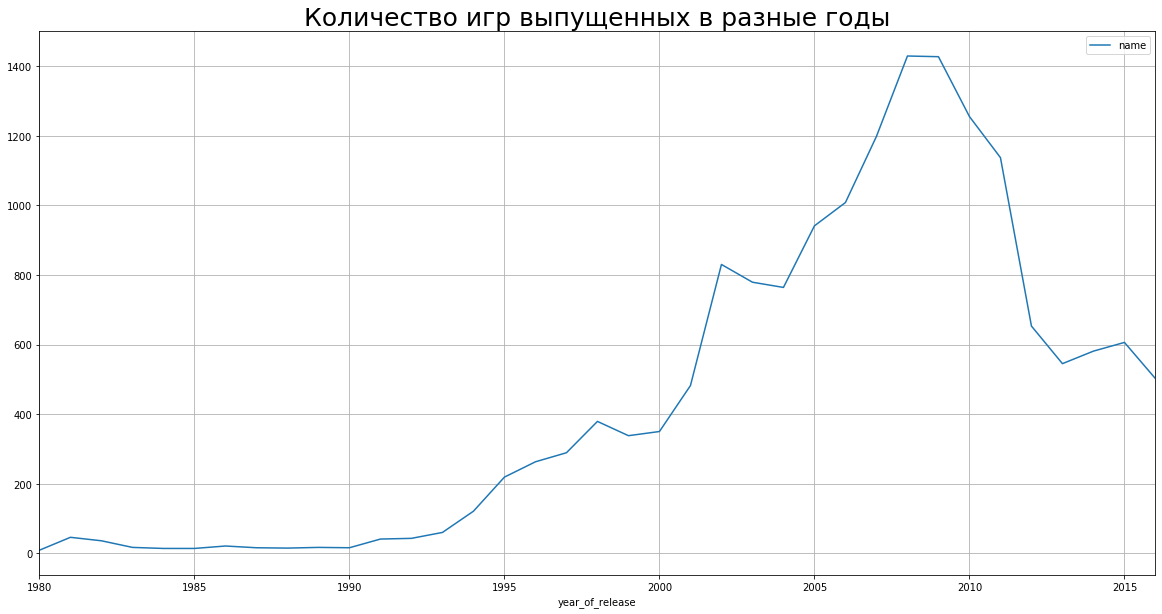

In [22]:
import matplotlib.pyplot as plt 

df.pivot_table(index='year_of_release', values='name', aggfunc='count').plot(grid=True, figsize=(20, 10)) 

plt.title('Количество игр выпущенных в разные годы', size=25)
plt.show

In [23]:
(df
    .query('year_of_release >= 2000')
    .pivot_table(index='year_of_release', values='name', aggfunc='count')
)

,name
year_of_release,
2000,350
2001,482
2002,830
2003,779
2004,764
2005,941
2006,1008
2007,1198
2008,1429


Из графика видно, что золотой век игр начинается в 1990 году. Пик производства игр приходится на 2008 год. С 2009 года начинается падение, и к 2013 году объем выпуска игр достиг уровня 2001 года. Золотой век игр окончен. Кризис в индустрии на лицо. На мой взгляд нужно планировать, какой рынок осваивать дальше, ну да ладно. В 2013 году рынок устоялся и в 2014 и 2015 годах даже показал рост, но в 2016 году снова падение. Для того, чтобы принять окончательное решение, какие годы включить в анализ, рассмотрим рынок консолей.

======================================================================================================================

Посмотрим, какие самые популярные консоли по суммарным продажам. Также посмотрим, какой средний срок жизни консоли:

In [24]:
top_platform = (df
    .pivot_table(index='platform', values='total_price', aggfunc='sum')
    .sort_values(by='total_price', ascending=False)
)

<function matplotlib.pyplot.show(*args, **kw)>

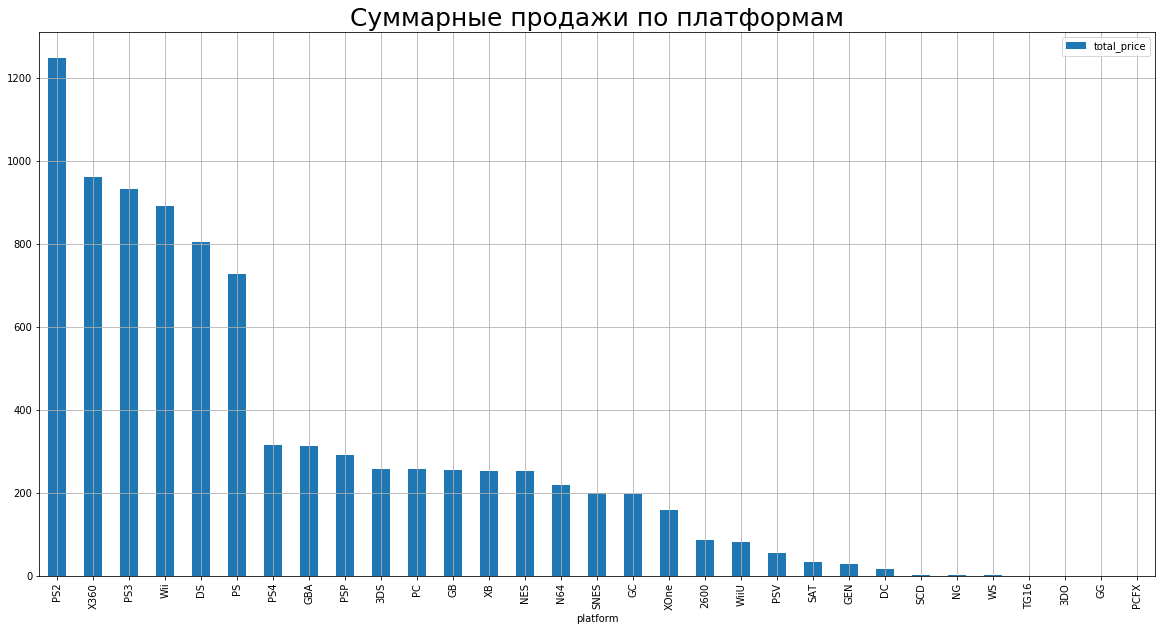

In [25]:
top_platform.plot(kind='bar', grid=True, figsize=(20, 10))

plt.title('Суммарные продажи по платформам', size=25)
plt.show

In [26]:
top_platform.head(6)

,total_price
platform,
PS2,1247.28
X360,961.30
PS3,931.34
Wii,891.18
DS,802.79
PS,727.58


Из графика видно, что шесть консолей PS2, X360, PS3, Wii, DS и PS лидируют по продажам. Посмотрим, актуальны ли они на данный момент:

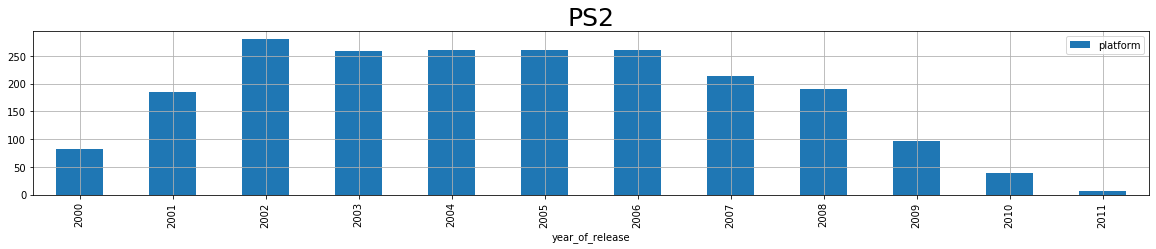

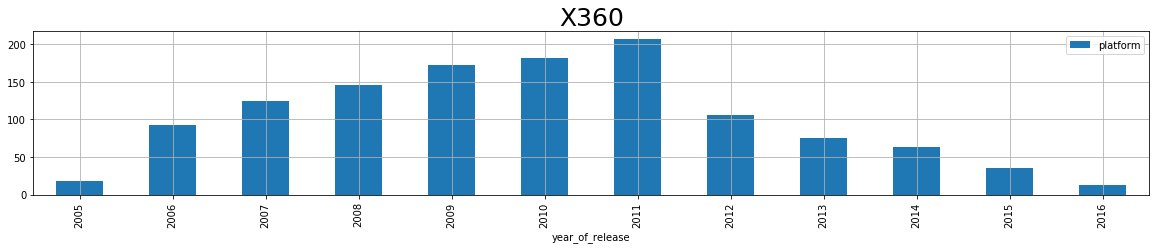

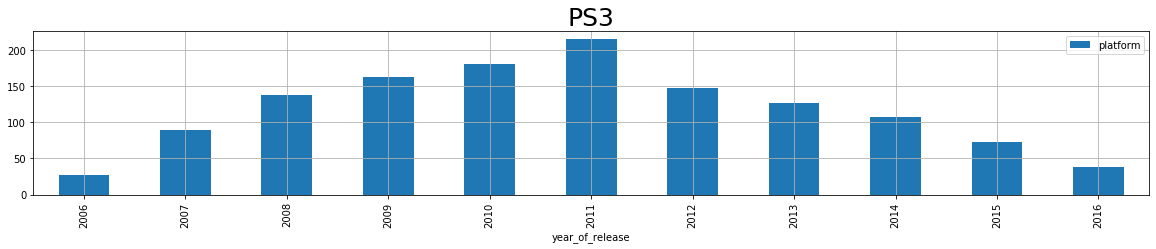

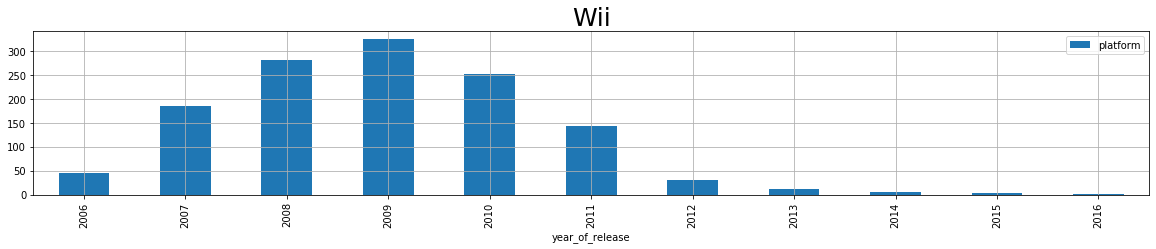

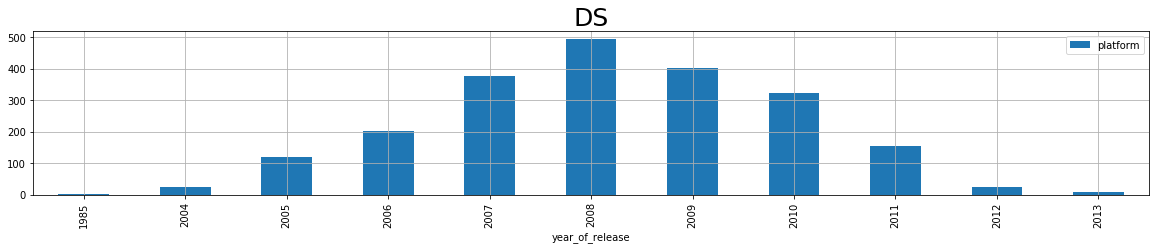

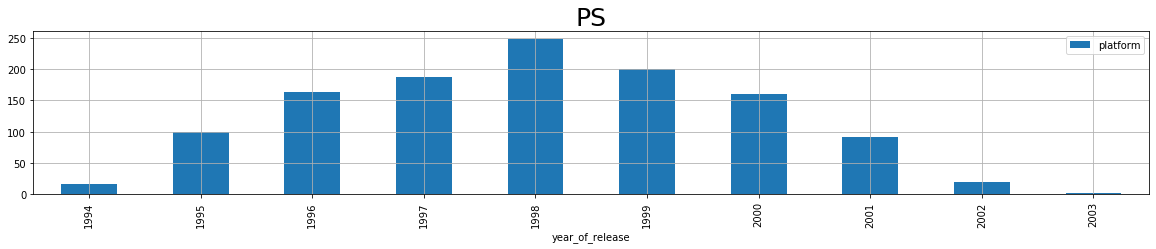

In [27]:
for i in top_platform.head(6).index:
    (df
        .query('platform in @i')
        .pivot_table(index='year_of_release', values='platform', aggfunc='count')
        .plot.bar(grid=True, figsize=(20, 3))
    )
    plt.title(i, size=25)
    plt.show

Из графиков видно, что все эти консоли демонстрируют падение, а некоторые консоли уже не используются. Также из графиков видно, что средний срок жизни консоли 10 лет. Из всего увиденного можно сделать вывод, что рынок игр пережил кризис, но падение все еще продолжается. Консоли, лидеры продаж, находятся в глубоком падении, либо уже не используются. Перед нами стоит задача понять, что будет актуально в 2017 году, а не проанализировать рынок от "адама и евы". На мой взгляд рынок судорожно пытается выжить и постоянно меняет стратегии в попытках предугадать спрос и, пока у него это плохо получается. Поэтому для анализа будем использовать только текущий 2016 год.

Посчитаем среднее значение жизни платформы по топовым платформам. В расчетах не будем использовать платформу DS, так как срок ее использования составляет 28 лет, что аномально долго для консоли.

In [28]:
platform_lifespan = (df
    .query('platform in @top_platform.head(6).index and platform != "DS"')
    .pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max'])
)

In [29]:
platform_lifespan.columns = ['min', 'max']

In [30]:
platform_lifespan['total_years'] = platform_lifespan['max'] - platform_lifespan['min']

In [31]:
platform_lifespan['total_years'].mean()

10.2

Средний срок службы консоли получился 10.2 года. Посмотрим на динамику рынка:

In [32]:
(df
    .query('year_of_release >= 2010')
    .pivot_table(index='year_of_release', values='name', aggfunc='count')
)

,name
year_of_release,
2010,1255
2011,1137
2012,653
2013,545
2014,581
2015,606
2016,502


К 2013 году объемы рынка сформировались и их изменения не столь значительны. Поэтому возьмем 2013 год как точку отсчета для анализа.

======================================================================================================================

Попробуем определить, какие консоли были актуальны за анализируемый периуд:

In [33]:
top_platform = (df
    .query('year_of_release >= 2013')
    .pivot_table(index='platform', values='total_price', aggfunc='sum')
    .sort_values(by='total_price', ascending=False)
)

<function matplotlib.pyplot.show(*args, **kw)>

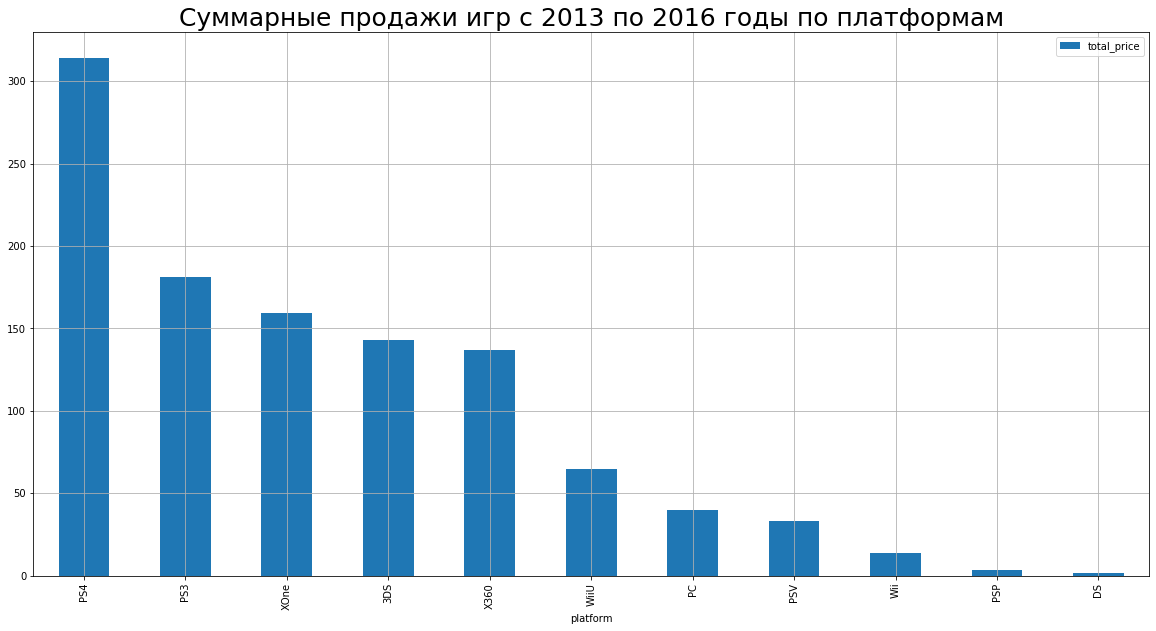

In [34]:
top_platform.plot(kind='bar', grid=True, figsize=(20, 10))

plt.title('Суммарные продажи игр c 2013 по 2016 годы по платформам', size=25)
plt.show

C 2013 по 2016 год по продажам лидируют консоли PS4, PS3, XOne, 3DS, X360. Посмотрим, какие из этих консолей показали рост спроса:

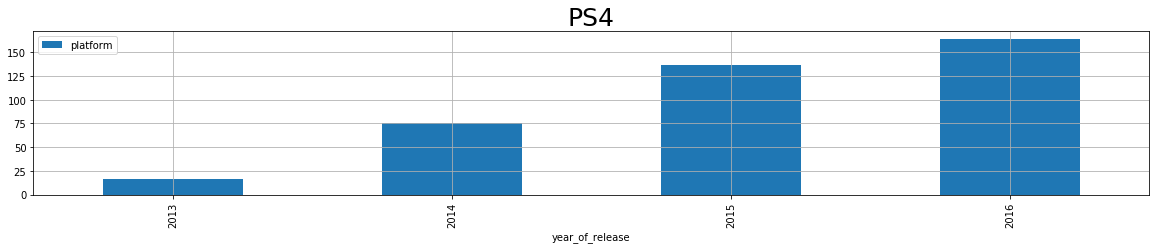

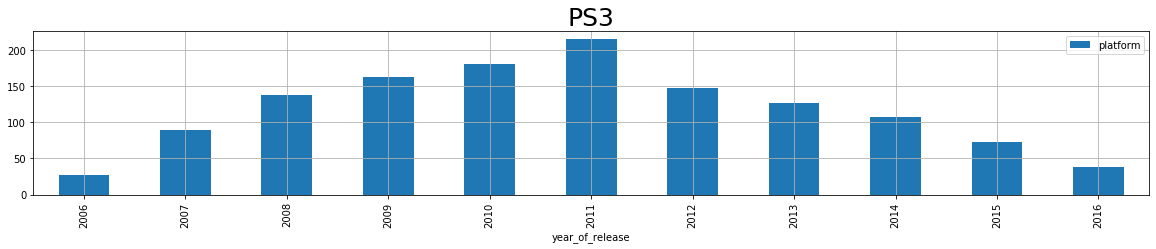

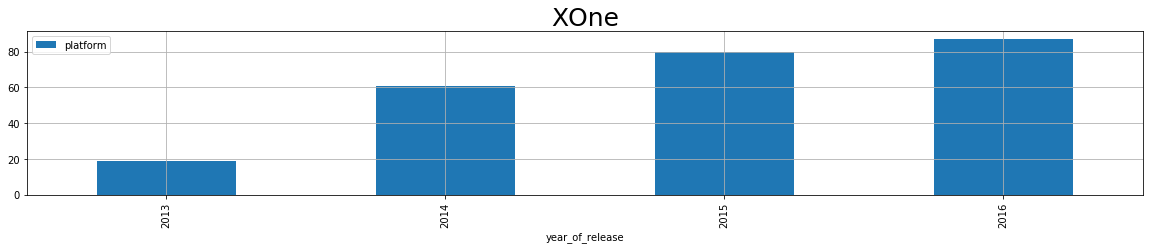

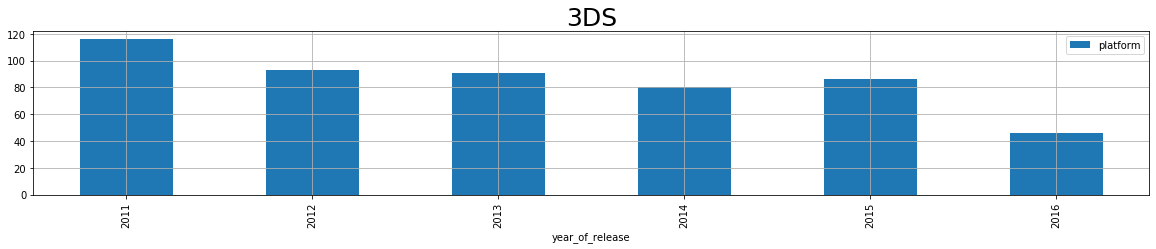

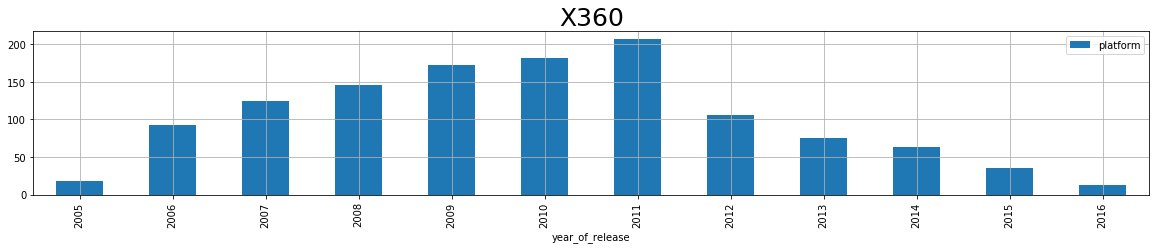

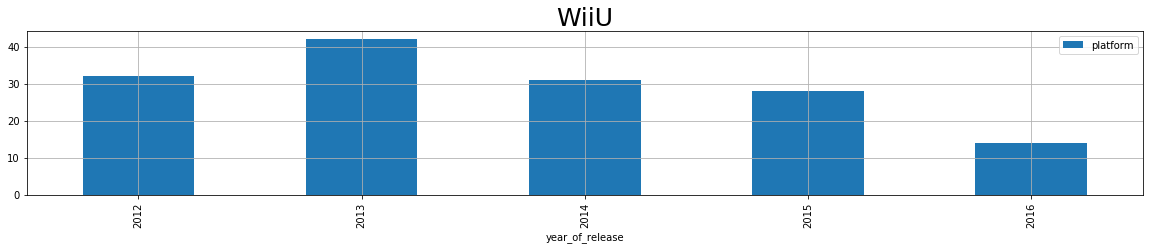

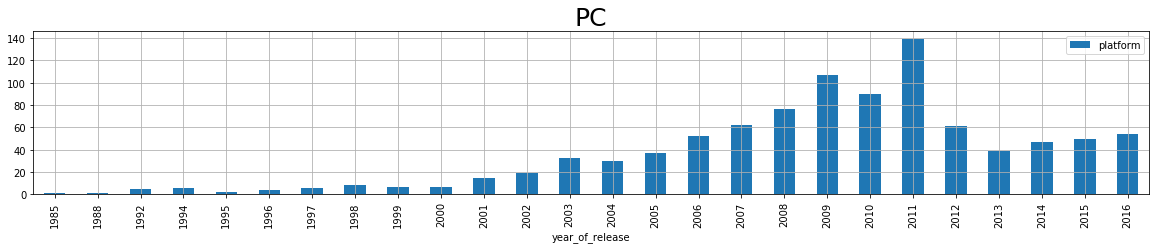

In [35]:
for i in top_platform.head(7).index:
    (df
        .query('platform in @i')
        .pivot_table(index='year_of_release', values='platform', aggfunc='count')
        .plot.bar(grid=True, figsize=(20, 3))
    )
    plt.title(i, size=25)
    plt.show

Из графиков видно, что рост спроса демонстрируют PS4, XOne и PC. Выдилим 3 потенциально прибыльные платформы PS4, XOne и PC.

In [36]:
top_3_platform = ['PS4', 'XOne', 'PC']

======================================================================================================================

Построим график «ящик с усами» по глобальным продажам игр в разбивке по топовым платформам:

<function matplotlib.pyplot.show(*args, **kw)>

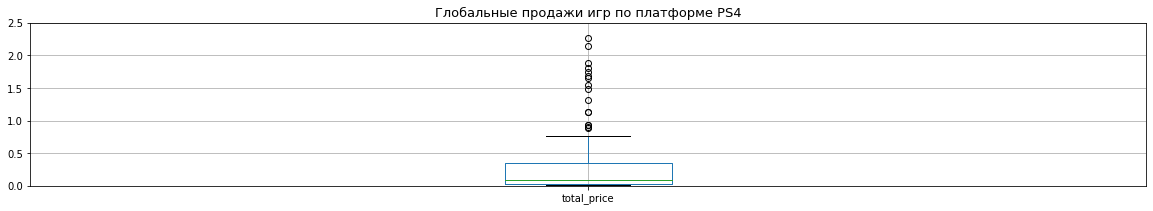

In [37]:
df.query('year_of_release == 2016 and platform == "PS4"').boxplot('total_price', figsize=(20, 3))
plt.ylim(0, 2.5)
plt.title('Глобальные продажи игр по платформе PS4', size=13)
plt.show

In [38]:
df.query('year_of_release == 2016 and platform == "PS4"').total_price.describe()

count    164.000000
mean       0.422256
std        0.968877
min        0.010000
25%        0.030000
50%        0.085000
75%        0.352500
max        7.600000
Name: total_price, dtype: float64

В среднем игры под платформу PS4 приносят 85000, но медиана меньше, чем среднее арифметическое, поэтому большая часть всех покупок лежит в диапазоне от 85000 до 352500. В редких случаях суммы покупок достигают 1500000 и даже 2000000 за игру.

<function matplotlib.pyplot.show(*args, **kw)>

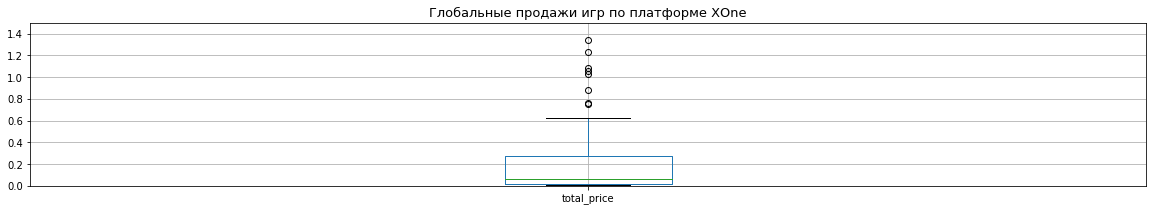

In [39]:
df.query('year_of_release == 2016 and platform == "XOne"').boxplot('total_price', figsize=(20, 3))
plt.ylim(0, 1.5)
plt.title('Глобальные продажи игр по платформе XOne', size=13)
plt.show

In [40]:
df.query('year_of_release == 2016 and platform == "XOne"').total_price.describe()

count    87.000000
mean      0.300575
std       0.549133
min       0.010000
25%       0.020000
50%       0.060000
75%       0.275000
max       2.650000
Name: total_price, dtype: float64

В среднем игры под платформу XOne приносят 60000, но медиана меньше, чем среднее арифметическое, поэтому большая часть всех покупок лежит в диапазоне от 60000 до 275000. В редких случаях суммы покупок достигают 1200000 за игру.

<function matplotlib.pyplot.show(*args, **kw)>

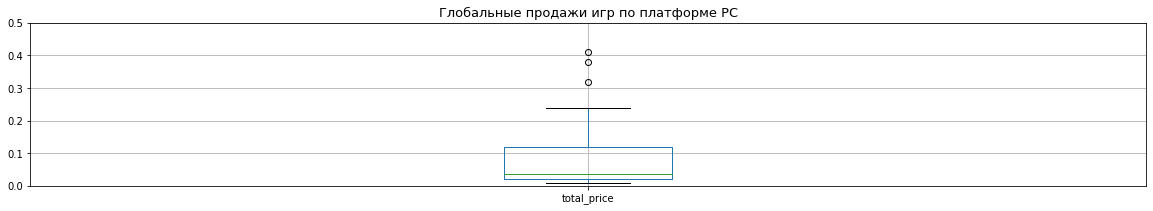

In [41]:
df.query('year_of_release == 2016 and platform == "PC"').boxplot('total_price', figsize=(20, 3))
plt.ylim(0, 0.5)
plt.title('Глобальные продажи игр по платформе PC', size=13)
plt.show

In [42]:
df.query('year_of_release == 2016 and platform == "PC"').total_price.describe()

count    54.000000
mean      0.097222
std       0.135916
min       0.010000
25%       0.020000
50%       0.035000
75%       0.120000
max       0.650000
Name: total_price, dtype: float64

В среднем игры под платформу PC приносят 35000, но медиана меньше, чем среднее арифметическое, поэтому большая часть всех покупок лежит в диапазоне от 35000 до 120000. В редких случаях суммы покупок достигают 400000 за игру. 

======================================================================================================================

Посмотрим, как влияют на продажи внутри топовых платформ отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами:

<function matplotlib.pyplot.show(*args, **kw)>

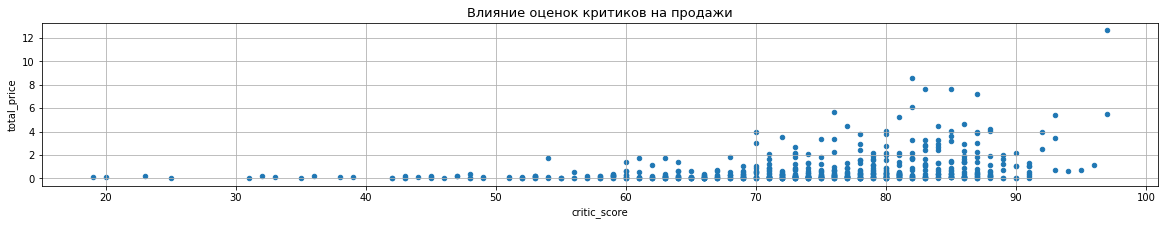

In [43]:
(df
    .query('year_of_release >= 2013 and critic_score != 0 and platform in @top_3_platform')
    .plot(x='critic_score', y='total_price', kind='scatter', grid=True, figsize=(20, 3))
) 
plt.title('Влияние оценок критиков на продажи', size=13)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

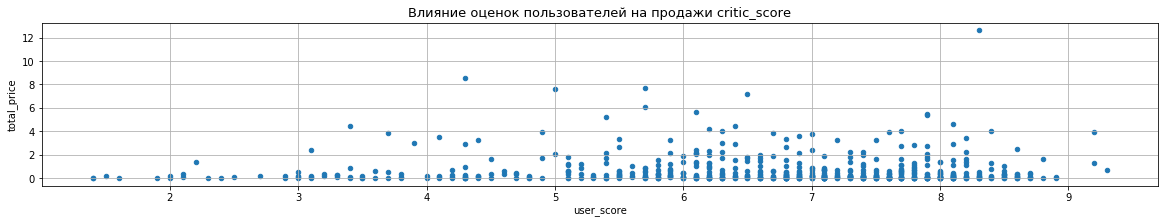

In [44]:
(df
    .query('year_of_release >= 2013 and user_score != 0 and platform in @top_3_platform')
    .plot(x='user_score', y='total_price', kind='scatter', grid=True, figsize=(20, 3))
) 
plt.title('Влияние оценок пользователей на продажи critic_score', size=13)
plt.show

In [45]:
df.query('year_of_release >= 2013 and user_score != 0 and critic_score != 0 and  platform in @top_3_platform')[['critic_score', 'user_score', 'total_price']].corr()

,critic_score,user_score,total_price
critic_score,1.000000,0.472370,0.324161
user_score,0.472370,1.000000,-0.020244
total_price,0.324161,-0.020244,1.000000


Из графиков видно, что оценки критиков очень слабо влияют на продажи, а оценки пользователей отрицательно влияют на продажи. Вывод: оценки и рейтинги никак не способствуют увеличению продаж.

======================================================================================================================

Посмотрим на общее распределение игр по жанрам, с 2013 по 2016 годы:

<function matplotlib.pyplot.show(*args, **kw)>

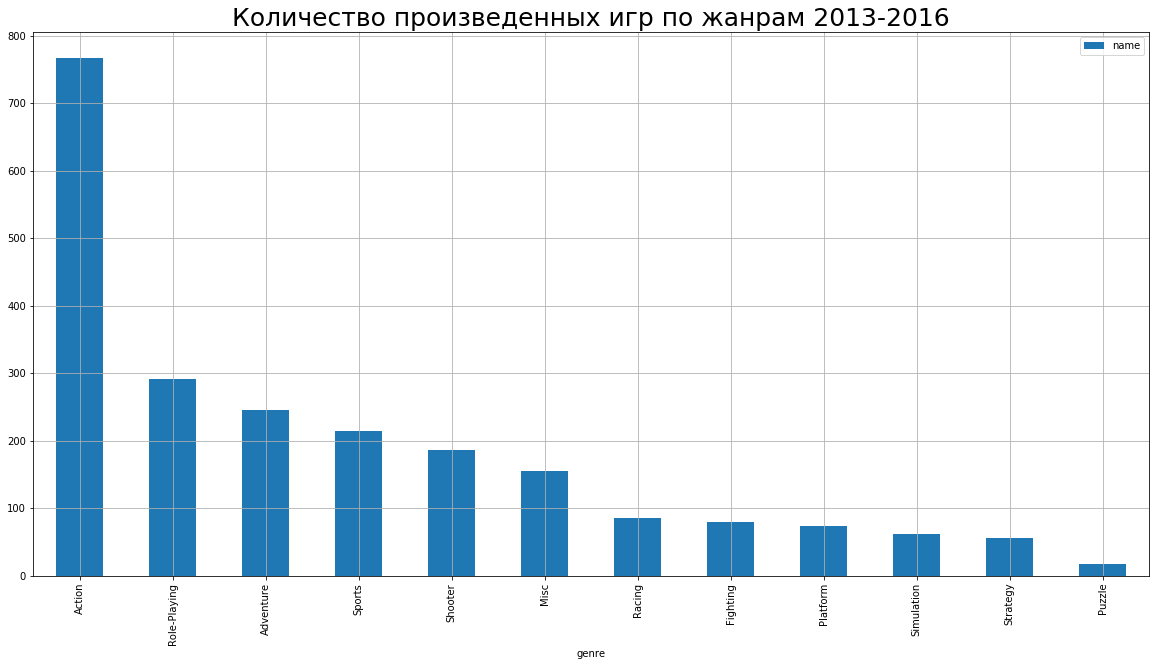

In [46]:
(df
    .query('year_of_release >= 2013')
    .pivot_table(index='genre', values='name', aggfunc='count')
    .sort_values(by='name', ascending=False)
    .plot(kind='bar', grid=True, figsize=(20, 10))
)

plt.title('Количество произведенных игр по жанрам 2013-2016', size=25)
plt.show

Из графика видно, что основная масса игр вышла в жанре Action. Посмотрим, игры каких жанров стали самыми прибыльными с 2013 по 2016 годы:

<function matplotlib.pyplot.show(*args, **kw)>

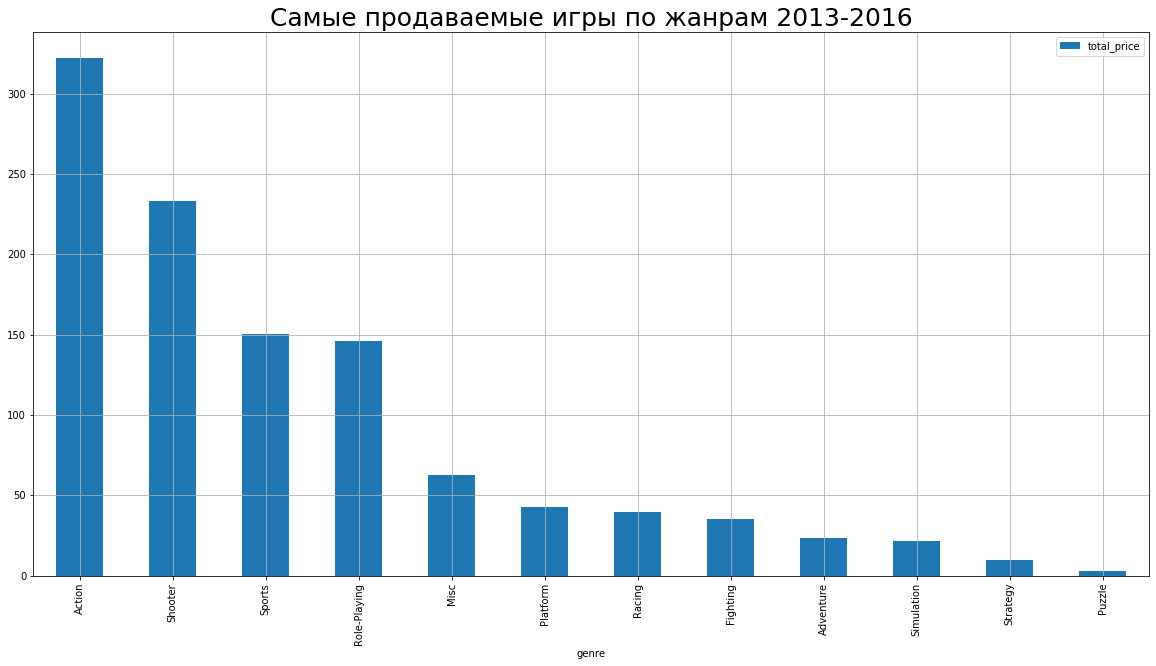

In [47]:
(df
    .query('year_of_release >= 2013')
    .pivot_table(index='genre', values='total_price', aggfunc='sum')
    .sort_values(by='total_price', ascending=False)
    .plot(kind='bar', grid=True, figsize=(20, 10))
)

plt.title('Самые продаваемые игры по жанрам 2013-2016', size=25)
plt.show

Action стали самыми покупаемыми играми с 2013 по 2016 годы. На втором месте Shooter. На третьем месте Sports. Из всего увиденного можно сделать вывод, что рынок видео-игр вошел в фазу падения. Потенциальная публика сокращается, остаются только истинные ценители видео-игр. Оценки критиков и игроков слабо влияют на спрос. 

[⬆️План работы](#section_id_0)

## <a id='section_id_4'>Шаг 4. Составить портрет пользователя каждого региона</a>

Составим портрет пользователя каждого региона по популярности платформ:

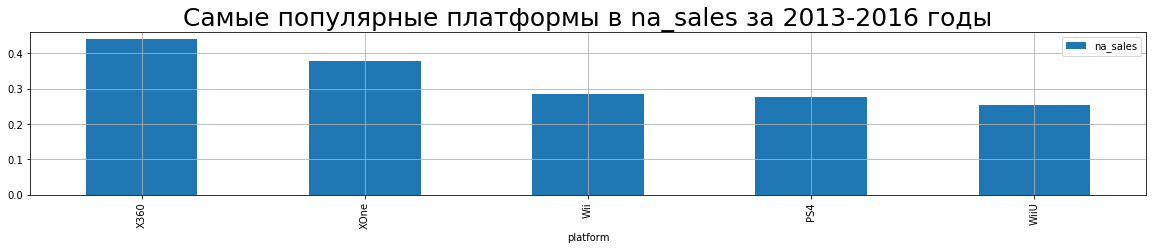

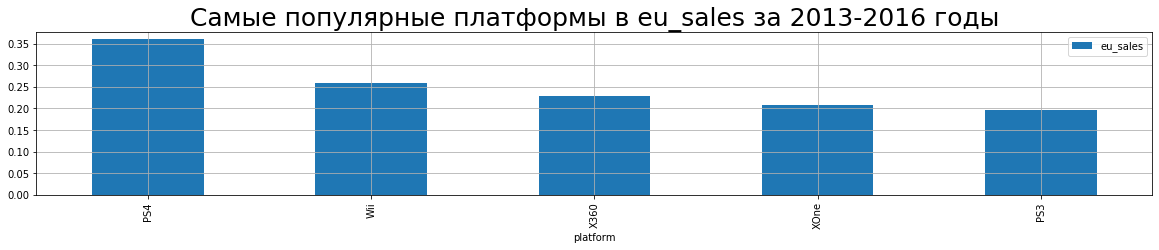

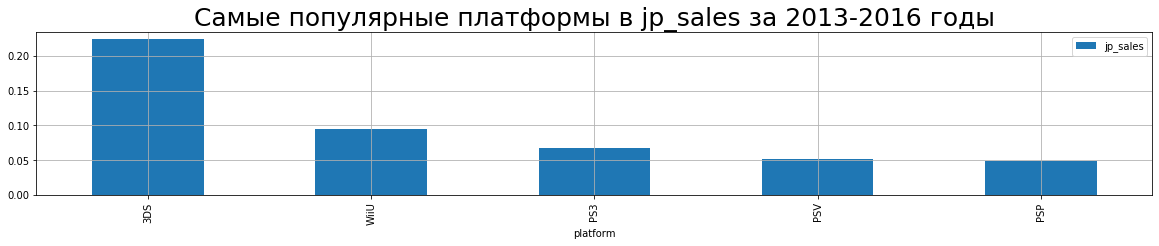

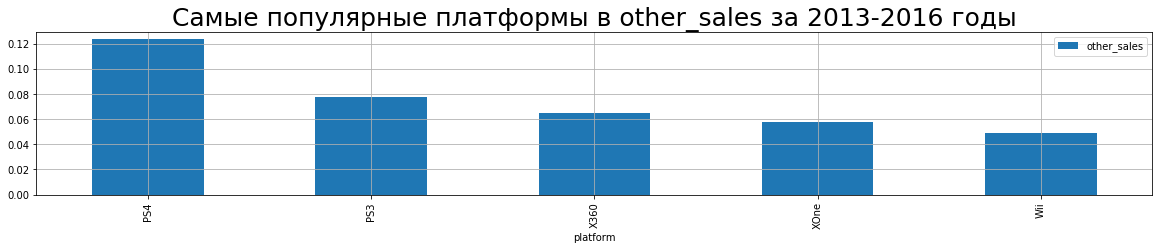

In [48]:
for i in ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']:   
    (df
        .query('year_of_release >= 2013')
        .pivot_table(index='platform', values=i)
        .sort_values(by=i, ascending=False)
        .head()
        .plot.bar(grid=True, figsize=(20, 3))
    )
    plt.title(f'Самые популярные платформы в {i} за 2013-2016 годы', size=25)
    plt.show

В Северной Америке наибольшую популярность имеет консоль XOne, на втором месте WiiU и на третьем PS4. В Европе наибольшую популярность имеет консоль PS4, на втором месте XOne и на третьем уже устаревшая платформа Wii. Японский рынок практически полностью принадлежит консоли 3DS, второе место WiiU и на третьем PSV. Японский рынок довольно специфичен, возможно под Японскую аудиторию нужно сформировать отдельную стратегию. В других странах наибольшую популярность имеет консоль PS4, на втором месте XOne и на третьем WiiU.

======================================================================================================================

Составим портрет пользователя каждого региона по популярности жанров:

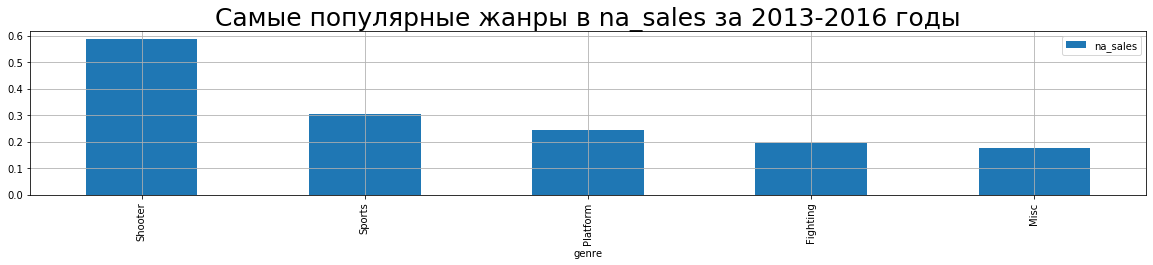

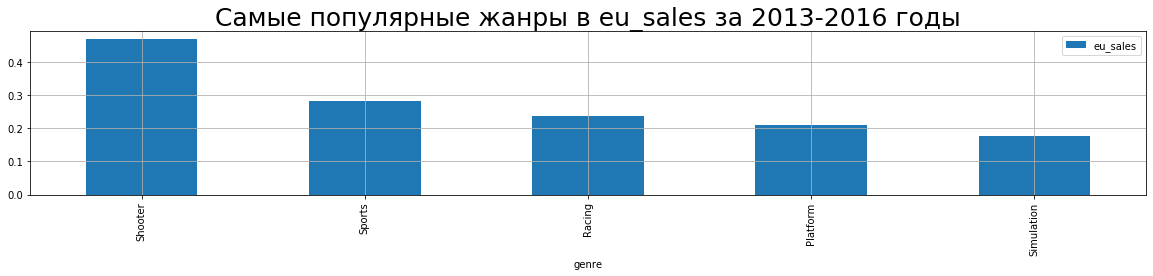

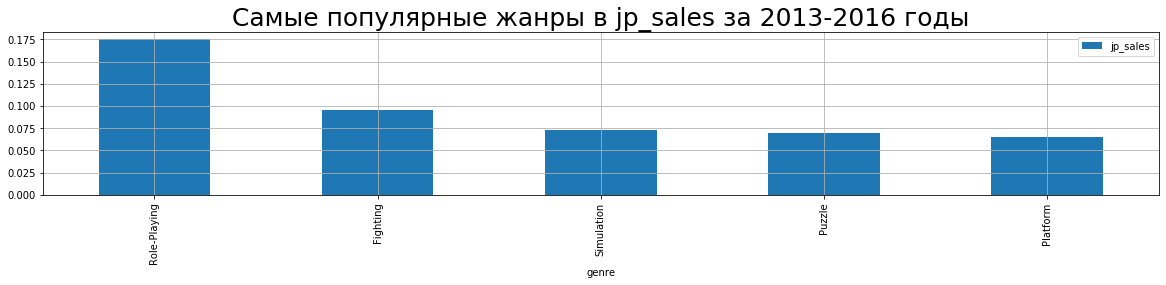

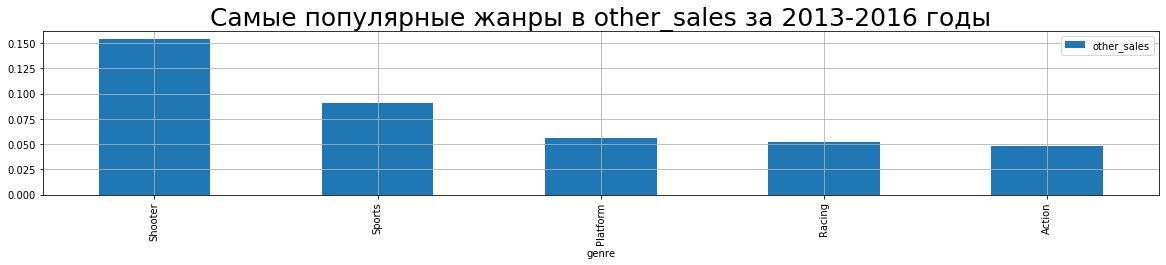

In [49]:
for i in ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']:   
    (df
        .query('year_of_release >= 2013')
        .pivot_table(index='genre', values=i)
        .sort_values(by=i, ascending=False)
        .head()
        .plot.bar(grid=True, figsize=(20, 3))
    )
    plt.title(f'Самые популярные жанры в {i} за 2013-2016 годы', size=25)
    plt.show

В Северной Америке наибольшую популярность имеет жанр Shooter, на втором месте Sports и на третьем Fighting. В Европе первое место, также, занимает жанр Shooter, на втором месте Sports и на третьем месте Platform. В Японии первое место у жанра Role-Playing, второе у жанра Fighting и на третьем Action. В других странах наибольшую популярность имеет жанр Shooter,  на втором месте Sports и на третьем Fighting. Снова специфическая Японская публика отличилась. Во всем остальном мире вкусы примерно одинаковые. Жанр Role-Playing нигде так не популярен, как в Японии. Возможно это связано с менталитетом Японского народа.

======================================================================================================================

Заполним пропущенные значения столбца rating значением unknown.

In [50]:
df.loc[df['rating'].isna(), 'rating'] = df.fillna('unknown')

Посмотрим, влияет ли рейтинг ESRB на продажи в отдельном регионе:

In [51]:
(df
    .query('year_of_release >= 2013')
    .pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'], aggfunc='sum')
)

,eu_sales,jp_sales,na_sales,other_sales
rating,,,,
E,83.36,15.14,79.05,22.61
E10+,42.69,5.89,54.24,12.57
M,145.57,14.11,165.27,47.08
T,41.95,20.59,49.79,14.29
unknown,78.91,85.05,89.42,23.46


На мой взгляд, скорее всего, в каждом регионе присутствует предпочтение определенному жанру игр, которое попадает под определенный рейтинг ESRB. Но, вряд ли пользователи каких-то регионов выбирают игры по рейтингу ESRB.

[⬆️План работы](#section_id_0)

## <a id='section_id_5'>Шаг 5. Проверить гипотезы</a>

Выдвинем две гипотезы:

    нулевая: средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
    альтернативная: средние пользовательские рейтинги платформ Xbox One и PC отличаются;
    
Сравним дисперсии столбца user_score, двух совокупностей:

In [52]:
import numpy as np
print(np.var(df.query('platform == "XOne" and user_score != 0').user_score))

1.8965188383045526


In [53]:
print(np.var(df.query('platform == "PC" and user_score != 0').user_score))

2.345726095993953


Дисперсия рейтингов по платформе XOne отличается от рейтингов по платформе PC довольно сильно, на 20%, поэтому добавим в метод st.ttest_ind аргумент equal_var со значением False:

In [54]:
from scipy import stats as st

alpha = 0.05
    
results = st.ttest_ind(
    df.query('platform == "XOne" and user_score != 0').user_score, 
    df.query('platform == "PC" and user_score != 0').user_score,  equal_var=False)
    
print('p-значение:', results.pvalue)
    
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 4.20093729348826e-06
Отвергаем нулевую гипотезу


Нулевая гипотеза не подтвердилась. А это значит, что средние пользовательские рейтинги платформ Xbox One и PC отличаются.

======================================================================================================================

Выдвинем две гипотезы:

    нулевая: средние пользовательские рейтинги жанров Action и Sports одинаковые;
    альтернативная: средние пользовательские рейтинги жанров Action и Sports отличаются;
    
Сравним дисперсии столбца user_score двух совокупностей:

In [55]:
print(np.var(df.query('genre == "Action"').user_score))

13.464808586673472


In [56]:
print(np.var(df.query('genre == "Sports"').user_score))

13.291733764193792


Дисперсия рейтингов по жанру Action отличается от рейтингов по платформе Sports очень незначительно, поэтому не будем добавлять в метод st.ttest_ind аргумент equal_var:

In [57]:
alpha = 0.05
    
results = st.ttest_ind(
    df.query('genre == "Action" and user_score != 0').user_score, 
    df.query('genre == "Sports" and user_score != 0').user_score)
    
print('p-значение:', results.pvalue)
    
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.08448041959282035
Не получилось отвергнуть нулевую гипотезу


Нулевую гипотезу не получилось отвергнуть. А это значит, что средние пользовательские рейтинги жанров Action и Sports одинаковые.

[⬆️План работы](#section_id_0)

## <a id='section_id_6'>Шаг 6. Написать общий вывод</a>

Из проведенного анализа, за 2016 год, можно сделать вывод, что самый интересный для пользователей жанр - это Shooter. Также пользователям интересны жанры Sports, Fighting и Action. Японская публика является очень специфической в этом плане, она предпочла жанр Role-Playing. Возможно, для Японской публики стоит составить индивидуальный план по продажам и рекламным компаниям. Самыми популярными платформами, демонстрирующими рост, являются PS4, XOne и PC. Также, по результатам анализа было выявлено, что всевозможные рейтинги очень слабо влияют на объемы продаж, поэтому не стоит ориентироваться на них при построении планов и рекламных компаний.

[⬆️План работы](#section_id_0)